# Anomaly detection on CPU usage

You will put on practice a lot of skills and your time series new knowledge to try improving a default prediction model.
You can use the resources provided in the course, Arima method, Prophet method, and of course continue looking for additional resources if you wish to have a different approach to the problem.


# Task -  

- Anomaly Detection means to identify unexpected events in a process. It means to detect threats to our systems that may cause harm in terms of security and leakage of important information, but the importance of Anomaly Detection is not limited to security. 
- The data of this project is based on per-minute metrics of the host’s CPU utilization.

In [3]:
%%capture
%pip install fbprophet
%pip install prophet
%pip install pystan==2.19.1.1 prophet
%pip install --upgrade plotly

In [4]:
%%capture
%pip install pmdarima

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode()
%matplotlib inline
plt.style.use('fivethirtyeight')

In [6]:
from prophet import Prophet
from prophet.plot import plot_plotly

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [7]:
data_train_a = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-train-a.csv', parse_dates=[0], infer_datetime_format=True,index_col=0)
data_test_a = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-test-a.csv', parse_dates=[0], infer_datetime_format=True,index_col=0)
data_train_a.head()

cpu
datetime                 
2017-01-27 18:42:00  1.14
2017-01-27 18:43:00  1.10
2017-01-27 18:44:00  1.09
2017-01-27 18:45:00  1.08
2017-01-27 18:46:00  1.08

Tenemos una columna y un index

In [8]:
# tenemos una columna y un indice

In [9]:
data_train_b = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-train-b.csv', parse_dates=[0], infer_datetime_format=True,index_col=0)
data_test_b = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-test-b.csv', parse_dates=[0], infer_datetime_format=True,index_col=0)
data_train_b.head()

cpu
datetime                 
2017-01-27 18:42:00  1.14
2017-01-27 18:43:00  1.10
2017-01-27 18:44:00  1.09
2017-01-27 18:45:00  1.08
2017-01-27 18:46:00  1.08

In [10]:
data_train_a.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 420 entries, 2017-01-27 18:42:00 to 2017-01-28 01:41:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cpu     420 non-null    float64
dtypes: float64(1)
memory usage: 6.6 KB


Vamos a resetear el índice

In [11]:
data_train_a.reset_index(inplace=True)

In [12]:
data_train_a.head()
# quedo todo en una columna

datetime   cpu
0 2017-01-27 18:42:00  1.14
1 2017-01-27 18:43:00  1.10
2 2017-01-27 18:44:00  1.09
3 2017-01-27 18:45:00  1.08
4 2017-01-27 18:46:00  1.08

Vamos a hacer a renombrar las columnas, porque la librería requiere determinado nombre, DS y Y, sino da error


In [13]:
data_train_a.rename(columns={'datetime': 'ds', 'cpu': 'y'}, inplace=True)

In [14]:
# hacemos el fit del modelo
m = Prophet()
m.fit(data_train_a)

05:21:08 - cmdstanpy - INFO - Chain [1] start processing
05:21:08 - cmdstanpy - INFO - Chain [1] done processing


ponemos como base 1 día segundos para hacer las predicciones. 

In [15]:
future = m.make_future_dataframe(periods=1)
future.tail()

ds
416 2017-01-28 01:38:00
417 2017-01-28 01:39:00
418 2017-01-28 01:40:00
419 2017-01-28 01:41:00
420 2017-01-29 01:41:00

In [16]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
416 2017-01-28 01:38:00   2.034758    1.522328    2.560319
417 2017-01-28 01:39:00   2.043367    1.553271    2.559425
418 2017-01-28 01:40:00   2.051975    1.537980    2.568239
419 2017-01-28 01:41:00   2.060584    1.519458    2.567008
420 2017-01-29 01:41:00  14.456898    9.628824   19.234233

05:21:15 - cmdstanpy - INFO - Chain [1] start processing
05:21:15 - cmdstanpy - INFO - Chain [1] done processing


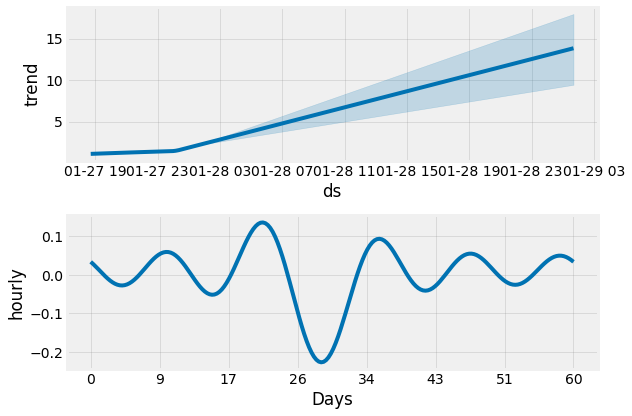

In [17]:
# Python
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='hourly', period=60, fourier_order=5)
forecast = m.fit(data_train_a).predict(future)
fig = m.plot_components(forecast)

In [18]:
Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)

05:21:22 - cmdstanpy - INFO - Chain [1] start processing
05:21:22 - cmdstanpy - INFO - Chain [1] done processing


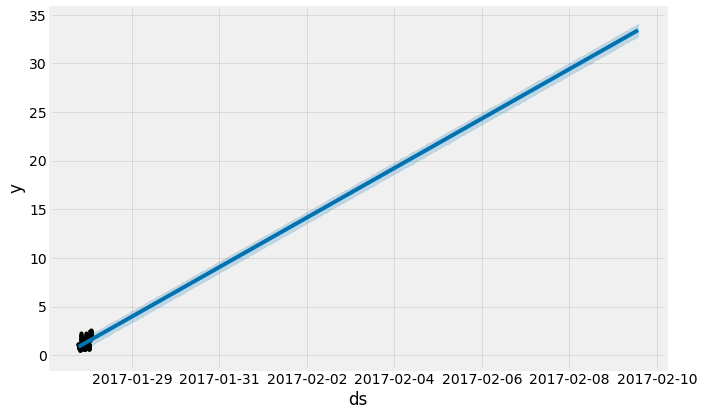

In [19]:
m = Prophet(changepoint_prior_scale=0.01).fit(data_train_a)

future = m.make_future_dataframe(periods=300, freq='H')

fcst = m.predict(future)

fig = m.plot(fcst)

05:21:30 - cmdstanpy - INFO - Chain [1] start processing
05:21:30 - cmdstanpy - INFO - Chain [1] done processing


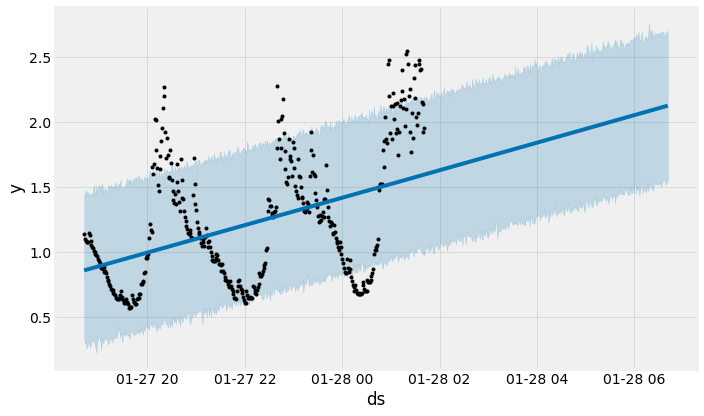

In [20]:
m = Prophet(changepoint_prior_scale=0.01).fit(data_train_a)
future = m.make_future_dataframe(periods=300, freq='1min')
fcst = m.predict(future)
fig = m.plot(fcst)

In [21]:
m=Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)

m.fit(data_train_a)

05:21:34 - cmdstanpy - INFO - Chain [1] start processing
05:21:34 - cmdstanpy - INFO - Chain [1] done processing


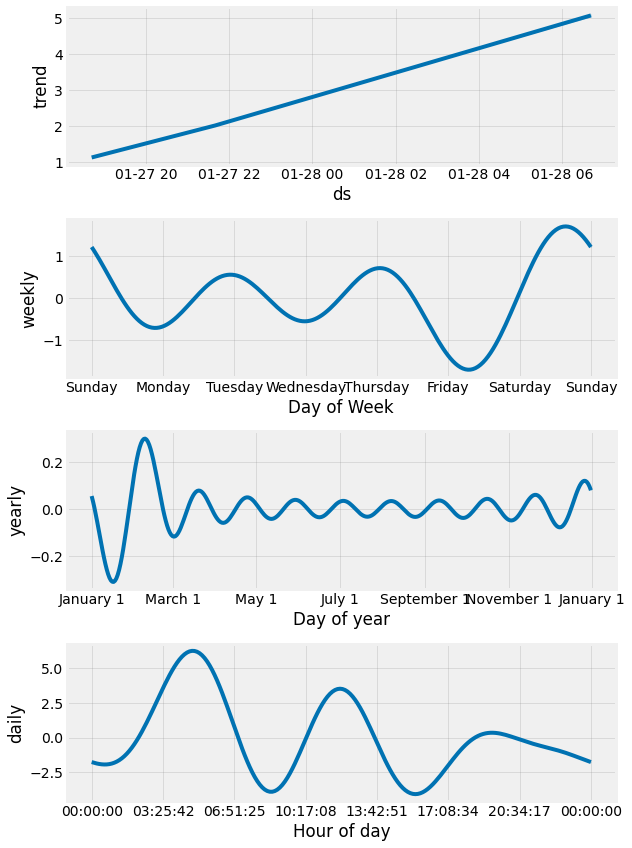

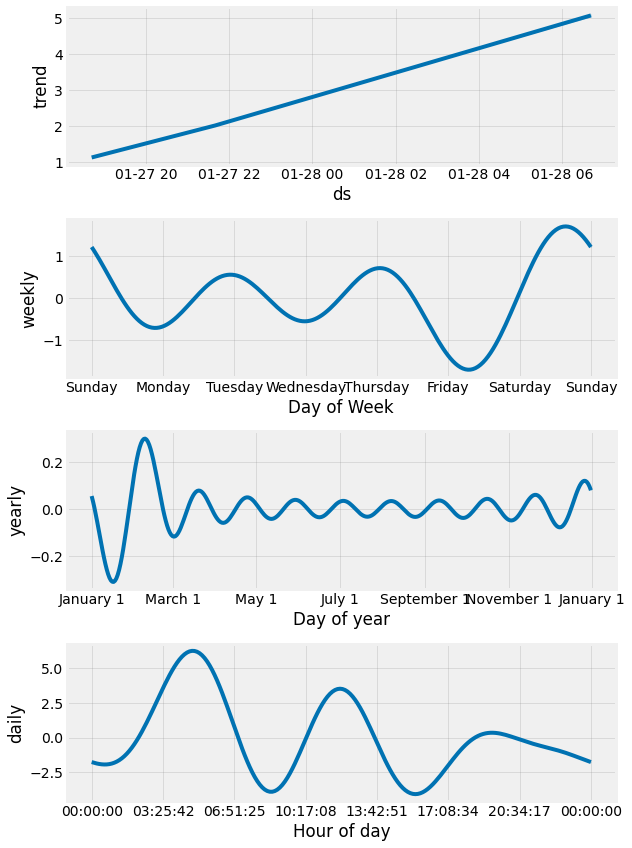

In [22]:
future = m.make_future_dataframe(periods=300, freq='1min')

fcst = m.predict(future)

m.plot_components(fcst)

Auto-Arima, prueba hasta encontrar el mejor modelo, basándose en la medida de error.

In [23]:
data_train_a = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-train-a.csv', parse_dates=[0], infer_datetime_format=True,index_col=0)

In [24]:
data_train_a.index = pd.to_datetime(data_train_a.index)

In [25]:
from pmdarima.arima import auto_arima

In [26]:
data_train_a.index = pd.to_datetime(data_train_a.index)
data_train_b.index = pd.to_datetime(data_train_b.index)

In [27]:
#aic se puede ir cambiando- es un estimador estadístico de la calidad del modelo. Cuando menor es mejor.

from pmdarima.arima import auto_arima
stepwise_model_a = auto_arima(data_train_a, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model_a.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=3.47 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-273.302, Time=0.10 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-368.085, Time=0.50 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.90 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-271.465, Time=0.11 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-417.827, Time=1.68 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=11.12 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=3.80 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=-419.762, Time=3.88 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-369.850, Time=0.42 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=7.57 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=4.42 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=-417.860, Time=2.68 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=-421.259, Time=3.61 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=-373.

In [28]:
stepwise_model_a.fit(data_train_a)

ARIMA(order=(3, 1, 2), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

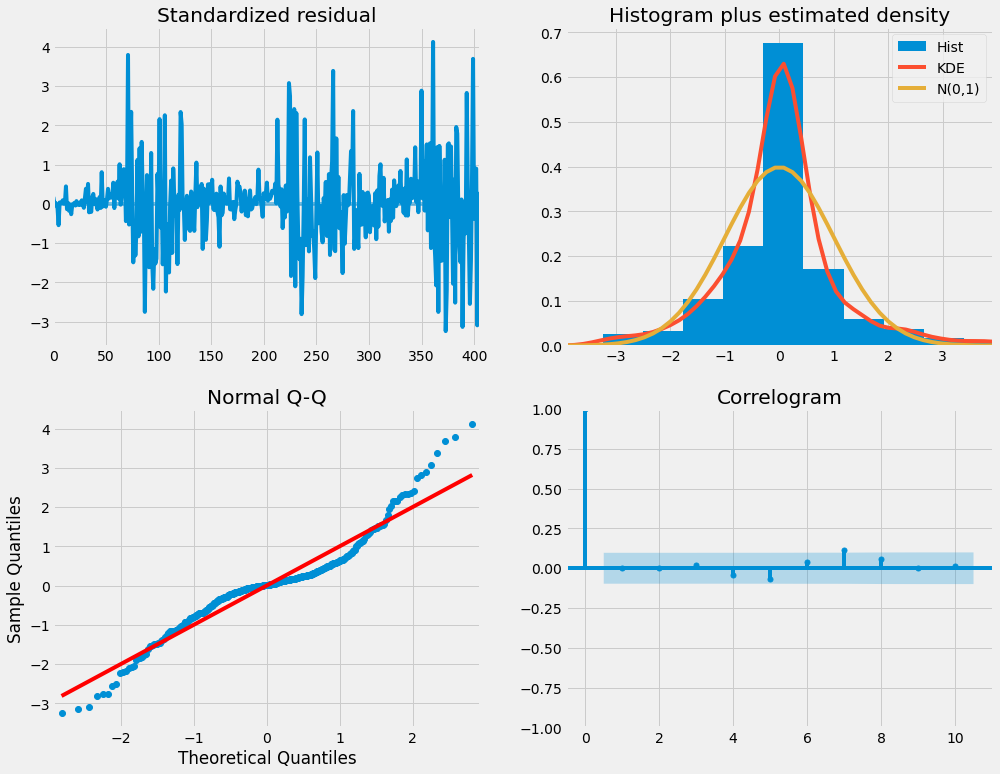

In [29]:
stepwise_model_a.fit(data_train_a).plot_diagnostics(figsize=(15, 12))
plt.show()

In [30]:
future_forecast = stepwise_model_a.predict(n_periods=60)

<AxesSubplot:xlabel='datetime'>

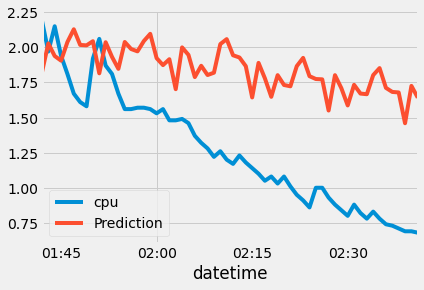

In [31]:
future_forecast = pd.DataFrame(future_forecast,index = data_test_a.index,columns=['Prediction'])
pd.concat([data_test_a,future_forecast],axis=1).plot()

In [32]:
# Save the model as a pickle
#filename = '../models/best_model_a.pkl'
#pickle.dump(stepwise_model_a, open(filename,'wb'))

In [66]:
import _pickle as cPickle # Faster than pickle
import pickle
import gzip

In [69]:
filename = '../models/best_model_a.pkl'
def save(object, filename, bin = 1):
	"""Saves a compressed object to disk
	"""
	file = gzip.GzipFile(filename, 'wb')
	file.write(cPickle.dump(stepwise_model_a, bin))
	file.close()



In [ ]:



def save(object, filename, protocol = -1):
    """Save an object to a compressed disk file.
       Works well with huge objects.
    """
    file = gzip.GzipFile(filename, 'wb')
    cPickle.dump(object, file, protocol))
    file.close()


Repetir lo mismo con b

In [35]:
data_train_b = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-train-b.csv', parse_dates=[0], infer_datetime_format=True,index_col=0)
data_test_b = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-test-b.csv', parse_dates=[0], infer_datetime_format=True,index_col=0)
data_train_b.head()

cpu
datetime                 
2017-01-27 18:42:00  1.14
2017-01-27 18:43:00  1.10
2017-01-27 18:44:00  1.09
2017-01-27 18:45:00  1.08
2017-01-27 18:46:00  1.08

In [36]:
data_train_b.reset_index(inplace=True)

In [37]:
data_train_b.rename(columns={'datetime': 'ds', 'cpu': 'y'}, inplace=True)

In [38]:
m = Prophet()
m.fit(data_train_b)

05:26:28 - cmdstanpy - INFO - Chain [1] start processing
05:26:28 - cmdstanpy - INFO - Chain [1] done processing


In [39]:
future = m.make_future_dataframe(periods=1)
future.tail()

ds
596 2017-01-28 04:38:00
597 2017-01-28 04:39:00
598 2017-01-28 04:40:00
599 2017-01-28 04:41:00
600 2017-01-29 04:41:00

In [40]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
596 2017-01-28 04:38:00  1.599602    0.991411    2.139081
597 2017-01-28 04:39:00  1.600650    1.061666    2.170682
598 2017-01-28 04:40:00  1.601698    1.025862    2.178226
599 2017-01-28 04:41:00  1.602746    1.044559    2.140215
600 2017-01-29 04:41:00  3.112259    2.562959    3.684010

05:26:31 - cmdstanpy - INFO - Chain [1] start processing
05:26:31 - cmdstanpy - INFO - Chain [1] done processing


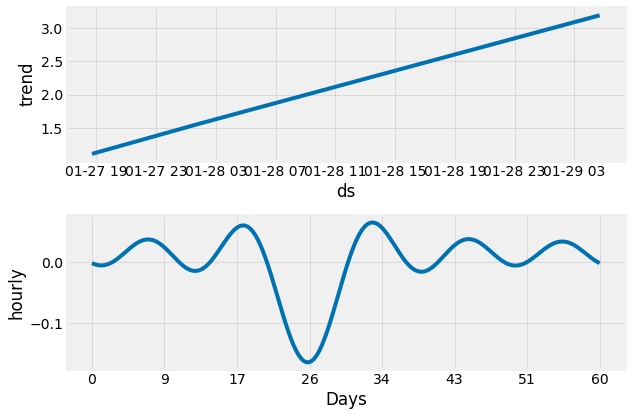

In [41]:
# Python
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='hourly', period=60, fourier_order=5)
forecast = m.fit(data_train_b).predict(future)
fig = m.plot_components(forecast)

In [42]:
Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)

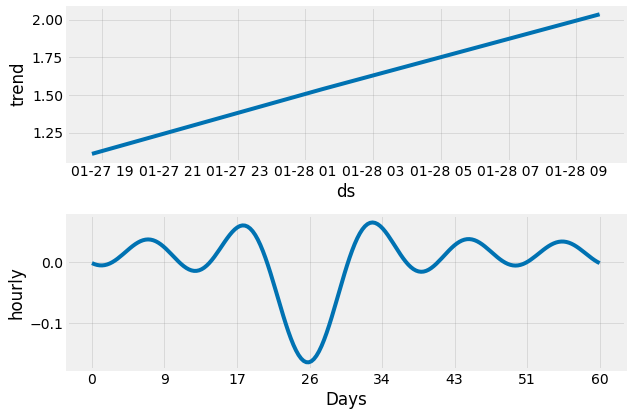

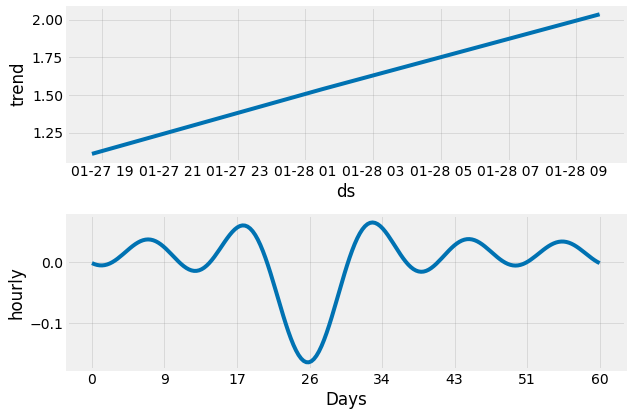

In [43]:
future = m.make_future_dataframe(periods=300, freq='1min')

fcst = m.predict(future)

m.plot_components(fcst)

05:26:44 - cmdstanpy - INFO - Chain [1] start processing
05:26:44 - cmdstanpy - INFO - Chain [1] done processing


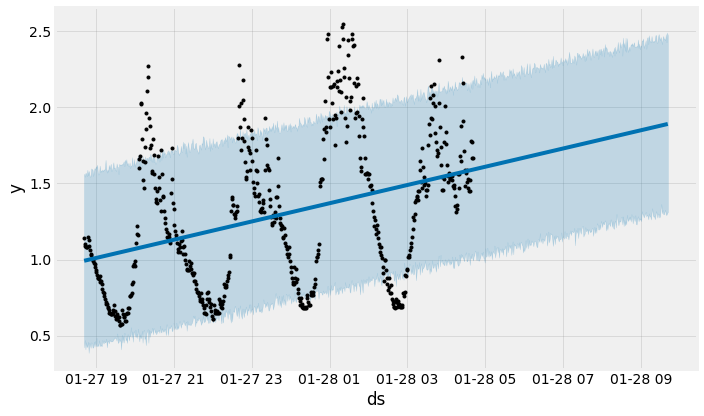

In [44]:
m = Prophet(changepoint_prior_scale=0.01).fit(data_train_b)
future = m.make_future_dataframe(periods=300, freq='1min')
fcst = m.predict(future)
fig = m.plot(fcst)

In [45]:
m=Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)

m.fit(data_train_b)

05:26:46 - cmdstanpy - INFO - Chain [1] start processing
05:26:46 - cmdstanpy - INFO - Chain [1] done processing


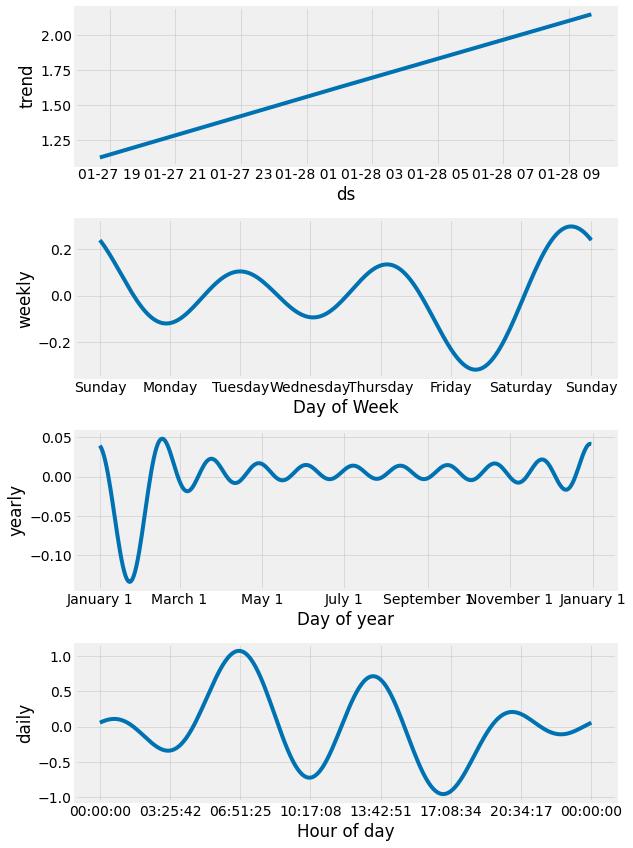

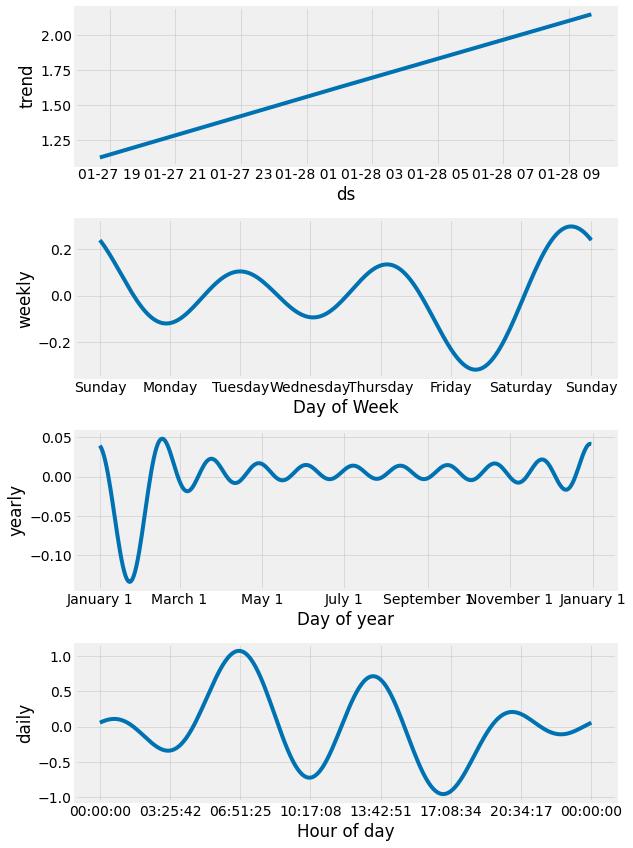

In [46]:
future = m.make_future_dataframe(periods=300, freq='1min')

fcst = m.predict(future)

m.plot_components(fcst)

In [47]:
data_train_b = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-train-b.csv', parse_dates=[0], infer_datetime_format=True,index_col=0)

In [48]:
data_train_b.index = pd.to_datetime(data_train_b.index)

In [49]:
#aic se puede ir cambiando- es un estimador estadístico de la calidad del modelo. Cuando menor es mejor.

from pmdarima.arima import auto_arima
stepwise_model_b = auto_arima(data_train_b, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model_b.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=8.54 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-376.973, Time=0.11 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-540.238, Time=0.69 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=4.51 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-375.034, Time=0.12 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-618.341, Time=2.27 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=15.30 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=5.51 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=-619.706, Time=1.88 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-541.973, Time=0.42 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=9.41 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=3.23 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=-618.493, Time=2.09 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=inf, Time=11.16 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=-617.729,

In [50]:
stepwise_model_b.fit(data_train_b)

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

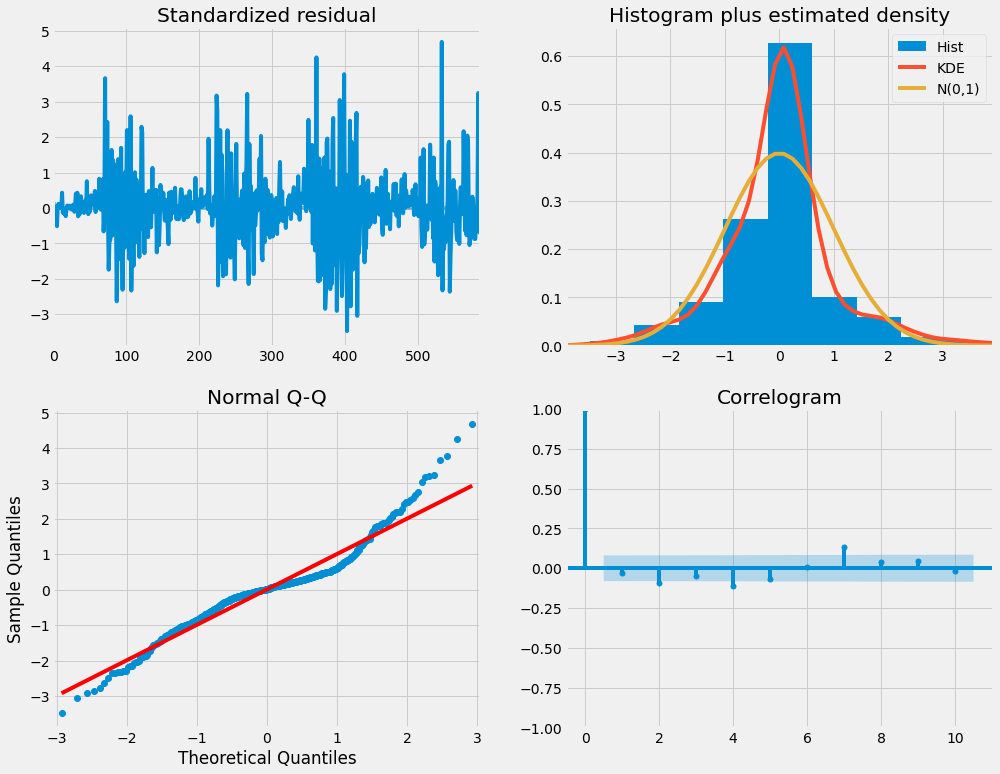

In [51]:
stepwise_model_b.fit(data_train_b).plot_diagnostics(figsize=(15, 12))
plt.show()

In [52]:
future_forecast = stepwise_model_b.predict(n_periods=60)

<AxesSubplot:xlabel='datetime'>

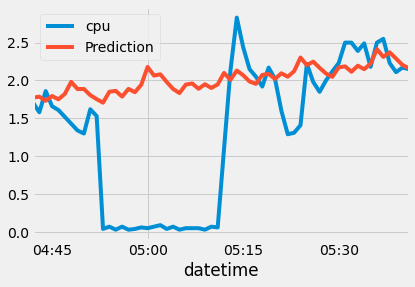

In [53]:
future_forecast = pd.DataFrame(future_forecast,index = data_test_b.index,columns=['Prediction'])
pd.concat([data_test_b,future_forecast],axis=1).plot()

In [54]:
# Save the model as a pickle
#filename = '../models/best_model_b.pkl'
#pickle.dump(stepwise_model_b, open(filename,'wb'))


In [56]:
filename1 = '../models/best_model_b.pkl'
def save(object, filename1, bin = 1):
	"""Saves a compressed object to disk
	"""
	file1 = gzip.GzipFile(filename1, 'wb')
	file1.write(pickle.dumps(stepwise_model_b, bin))
	file.close()
